# Expected Delivery

👇 Run the code below

In [48]:
import pandas as pd

data= pd.read_csv('data/order_deliveries.csv')
data.describe()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8328.359000,52.580000,39.418000,30.876000
std,5743.795899,12.026064,21.715728,12.298857
min,100.000000,20.000000,5.000000,11.000000
25%,1887.500000,45.000000,15.000000,22.000000
50%,8683.000000,53.000000,51.000000,31.000000
75%,12275.000000,57.000000,56.000000,36.000000
max,30000.000000,102.000000,93.000000,118.000000


Each observation of the dataset represents an item being delivered from a  `seller_state` to a `customer_state`. The columns describe the size and weight of each item. There are two columns that inform on the time the order was placed (`order_purchase_timestamp`) and it was delivered (`order_delivered_customer_date`).

The task is to to inform customers the **number of days until delivery** at the moment the order is placed. Because customers would rather a delivery arrive early than late, you should favor a model that **overshoots the predictions**.

## Target engineering

👇 Create the target by computing the time difference between `order_purchase_timestamp` and `order_delivered_customer_date`. Round it up to days.

<details>
<summary>💡 Hint</summary>
    
Convert each column to datetime and compute the difference.
    
[`to_datetime` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html)
    
[`dt.days` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.days.html)
</details>

In [49]:
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date'])
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['delivery_delay'] = (data['order_delivered_customer_date'] - data['order_purchase_timestamp']).dt.days

## Feature preprocessing

👇 Perform the necessary preprocessing on the features

<details>
<summary>💡 Hints </summary>
    
- One-hot-encode customer and seller state information with [get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

    
- Scale product details 
    
</details>

<AxesSubplot:ylabel='Frequency'>

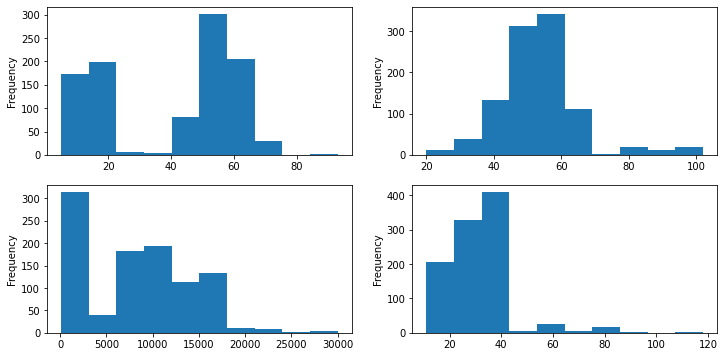

In [50]:
import matplotlib.pyplot as plt
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (12, 6))
data['product_height_cm'].plot.hist(ax = ax1)
data['product_length_cm'].plot.hist(ax = ax2)
data['product_weight_g'].plot.hist(ax = ax3)
data['product_width_cm'].plot.hist(ax = ax4)

In [51]:
# Getting numerical features and cat features in lists:

num = data.drop(columns = 'delivery_delay')
# Generate masks for categorical features
num_features_mask = num.dtypes == 'int64'
categorical_features_mask = num.dtypes == 'object'
# Feature names
num_features = num.columns[num_features_mask].tolist()
cat_features = num.columns[categorical_features_mask].tolist()

In [52]:
#solution:
from sklearn.preprocessing import MinMaxScaler

# Scale product features
scaler = MinMaxScaler()
data['product_weight_g'],data['product_length_cm'],data['product_height_cm'],data['product_width_cm']= scaler.fit_transform(data[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']]).T

# One hot encode state features
data = pd.get_dummies(data,columns = ['customer_state','seller_state'] )

data.head()

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,order_delivered_customer_date,delivery_delay,customer_state_AL,customer_state_AM,customer_state_AP,...,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,seller_state_SC,seller_state_SP
0,0.057692,0.402439,0.056818,0.271028,2017-09-18 20:11:00,2017-09-28 19:19:00,9,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.020067,0.548780,0.147727,0.158879,2017-10-16 14:12:00,2017-10-25 16:43:00,9,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.057692,0.402439,0.056818,0.271028,2018-04-14 00:04:00,2018-04-25 23:10:00,11,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.057692,0.402439,0.056818,0.271028,2017-10-10 15:32:00,2017-10-23 12:09:00,12,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.057692,0.402439,0.056818,0.271028,2017-09-26 11:51:00,2017-10-10 18:05:00,14,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [53]:
# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# scaler.fit(data[num_features])
# data[num_features] = scaler.transform(data[num_features])

In [54]:
# Encode with get_dummies
# data = pd.get_dummies(data, columns = cat_features)


In [55]:
data.head(10)

,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_purchase_timestamp,order_delivered_customer_date,delivery_delay,customer_state_AL,customer_state_AM,customer_state_AP,...,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO,seller_state_SC,seller_state_SP
0,0.057692,0.402439,0.056818,0.271028,2017-09-18 20:11:00,2017-09-28 19:19:00,9,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0.020067,0.548780,0.147727,0.158879,2017-10-16 14:12:00,2017-10-25 16:43:00,9,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0.057692,0.402439,0.056818,0.271028,2018-04-14 00:04:00,2018-04-25 23:10:00,11,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.057692,0.402439,0.056818,0.271028,2017-10-10 15:32:00,2017-10-23 12:09:00,12,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0.057692,0.402439,0.056818,0.271028,2017-09-26 11:51:00,2017-10-10 18:05:00,14,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5,0.003344,0.304878,0.113636,0.224299,2018-01-13 10:43:00,2018-02-02 17:32:00,20,0,0,0,...,1,0,0,0,0,0,0,0,0,1
6,0.570234,0.463415,0.636364,0.121495,2017-01-27 22:14:00,2017-02-14 13:15:00,17,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,0.015050,0.487805,0.056818,0.271028,2018-03-04 16:17:00,2018-04-05 22:16:00,32,0,0,0,...,1,0,0,0,0,0,0,0,0,1
8,0.028428,0.304878,0.113636,0.224299,2018-05-15 08:57:00,2018-05-21 16:56:00,6,0,0,0,...,0,0,0,0,0,0,1,0,0,1
9,0.028428,0.304878,0.113636,0.224299,2018-07-13 20:08:00,2018-07-20 18:03:00,6,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## Linear Regression

👇 Train a `LinearRegression` model and make cross validated predictions.

[`cross_val_predict` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)

In [56]:
# Getting statte in a feature list:

num = data.drop(columns = 'delivery_delay')
# Generate masks for categorical features
states_features_mask = num.dtypes == 'uint8'
# Feature names
states_features = num.columns[states_features_mask].tolist()

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# features = states_features + num_features
features = num_features + ['seller_state_SP', 'seller_state_SC', 'customer_state_SP'\
                          ,'customer_state_RJ', 'customer_state_MG', 'customer_state_BA']
X_train, X_test, y_train, y_test = train_test_split(data[features], data['delivery_delay'], test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.19008024264902568

In [58]:
# Cross validate model
from sklearn.model_selection import cross_validate, cross_val_predict
cv_results = cross_validate(model, data[features], data['delivery_delay'], cv=5)
display(cv_results)

{'fit_time': array([0.00573874, 0.00338244, 0.00306344, 0.00298166, 0.00303769]),
 'score_time': array([0.00243282, 0.00217605, 0.0019958 , 0.00185633, 0.00202823]),
 'test_score': array([0.22036056, 0.17479968, 0.13317246, 0.09195546, 0.22111127])}

In [59]:
#Predictions
data['predictions'] = cross_val_predict(model, data[features], data['delivery_delay'])

In [60]:
#MSE:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(data['delivery_delay'], data['predictions'] )
rmse = math.sqrt(mse)
print('RMSE =', round(rmse, 2))

mae = mean_absolute_error(data['delivery_delay'], data['predictions'])
print('MAE =', round(mae, 2))

RMSE = 12.39
MAE = 7.4


👇 Engineer a scoring metric that preserves the magnitude of the target and the direction of the errors made. Encapsulate the scoring metric in a function.

<details>
<summary>💡 Hint</summary>
    
Computing the mean differences between predicted and true values is a simple way to preserve direction and magnitude.
    
</details>

In [61]:
#Custom metric
def difference(X,Y):
    return (X - Y).mean()

In [62]:
diff_metric =  difference(data['predictions'], data['delivery_delay'])
print('Mean difference =', round(diff_metric, 2))

Mean difference = 0.02


##  KNN Regressor

👇 Train a `KNNRegressor` model and use your scoring function to evaluate its performance.

In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Baseline model
KNN_model = KNeighborsRegressor()
X_train, X_test, y_train, y_test = train_test_split(data[features], data['delivery_delay'], test_size = 0.3)
KNN_model.fit(X_train, y_train)

# # Cross validate model
cv_results = cross_validate(KNN_model, data[features], data['delivery_delay'], cv=5)
display(cv_results)

# KNN Accuracy
data['predictions_knn'] = cross_val_predict(KNN_model, data[features], data['delivery_delay'])

{'fit_time': array([0.00462723, 0.00552082, 0.00526428, 0.00406313, 0.0045352 ]),
 'score_time': array([0.01045799, 0.00834465, 0.00622058, 0.00509501, 0.00883818]),
 'test_score': array([-0.24754718, -0.91154364,  0.05342763,  0.01664016, -0.01007603])}

In [64]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(data['delivery_delay'], data['predictions_knn'] )
rmse = math.sqrt(mse)
print('RMSE =', round(rmse, 2))

mae = mean_absolute_error(data['delivery_delay'], data['predictions_knn'])
print('MAE =', round(mae, 2))

diff_metric =  difference(data['predictions_knn'], data['delivery_delay'])
print('Mean difference =', round(diff_metric, 2))

RMSE = 13.98
MAE = 8.51
Mean difference = 0.92


## Model Selection

❓ Which of the two models would you chose for the task and based on your metric's score?

<details>
<summary>Answer</summary>

The model best suited for the task is the one with the positive error (or least negative). If the average error is positive, the model tends to overshoot delivery.
</details>

# 🏁